# Essential dynamics

In [1]:
import torch
import pickle
from torch.utils.data import DataLoader

from devinterp.slt.forms import *


plt.rcParams["figure.dpi"] = 300

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
models = torch.load(f"../model1.pt", map_location=DEVICE)

In [ ]:
BATCH_SIZE = 1024
dataset = torch.load("ED_dataset.pt")
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
outputs = get_output_for_models(models, dataloader, device=DEVICE)

Explained variance of PCA
[0.5630448  0.15191932 0.0681259  0.0370252 ]
len(colors) != len(transitions), using rainbow palette.
Number of samples: 5000
Processing smoothing for PC1


/home/paperspace/devinterp/src/devinterp/slt/forms.py:103: UserWarning: Can't plot vertex influence when cusp data not provided
  warnings.warn("Can't plot vertex influence when cusp data not provided")


Processing smoothing for PC2
Processing smoothing for PC3
Plotting PC1 vs PC2
Plotting PC1 vs PC3
Plotting PC2 vs PC3


/home/paperspace/devinterp/src/devinterp/slt/forms.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


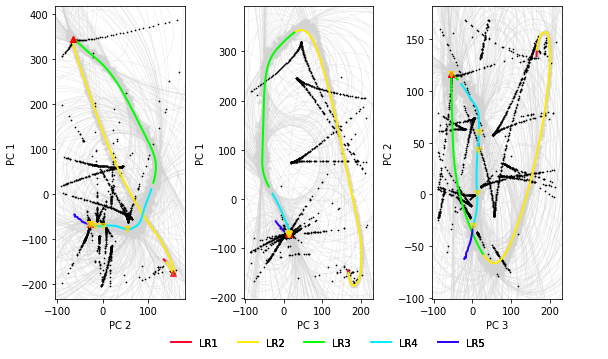

In [ ]:
TRANSITIONS = [  # TODO automate
    (0, 10, "LR1"),
    (10, 400, "LR2"),
    (400, 1_200, "LR3"),
    (1_260, 3_000, "LR4"),
    (3_000, 5_000, "LR5"),
]

# The marked cusps were discovered by the automated vertex discovery and visual inspection,
# while the influence regions are based on analysing the distance functions
marked_cusp_data = [  # TODO automate
    {"idx": 25, "influence_start": 18, "influence_end": 26},
    {"idx": 345, "influence_start": 300, "influence_end": 400},
    {"idx": 1_061, "influence_start": 900, "influence_end": 1_250},
    {"idx": 1_689, "influence_start": 1_500, "influence_end": 1_900},
]

ED_FILENAME = "ED-LR-seed1.pkl"
with open(ED_FILENAME, "rb") as file:
    pca, transformed_samples = pickle.load(file)


print("Explained variance of PCA")
print(pca.explained_variance_ratio_)

fig = plot_essential_dynamics_grid(
    transformed_samples,
    transitions=TRANSITIONS,
    # marked_cusp_data=marked_cusp_data,
    num_pca_components=3,
    plot_vertex_influence=True,
    plot_caustic=True,
    figsize=(8, 8 / 10 * 6),
    num_sharp_points=5,
    num_vertices=5,
    osculate_start=1,
    osculate_end_offset=2000,
    osculate_skip=8,
    early_smoothing=1,
    late_smoothing=60,
    late_smoothing_from=200,
)
plt.show()